/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


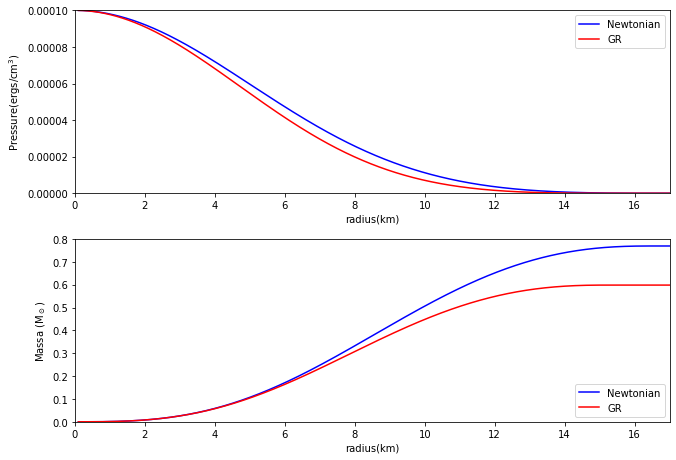

In [3]:
#non-relativistic neutron star
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def eps(a,K,gamma):
    f=((R0/a)**gamma/K)**(1./(gamma-1))
    f1=convert(f/10)
    return f1

def bet(e0):
    return 4*pi*e0

def kbar(K,gamma):
    e0=1.6268782212048284e+38
    return K*e0**(gamma-1)

y1=eps(1.,knr,gnr)
y2=bet(y1)
y3=kbar(knr,gnr)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    K=kbar(knr,gnr)
    if P<=0:
        P=1.0e-20
    return (P/K)**(3./5.)

def hydros(y,r):
    P,M=y
    beta=y2
    eden=eos(P)
    one=-R0*eden*M/r**2
    two=beta*r**2*eden
    derivs=[one,two]
    return derivs

def tov(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def hsolve(P0,rStop):
    beta=y2
    dr=0.01
    eden=eos(P0)
    M0=beta*dr**3*eden/3.
    y0=[P0,M0]  
    r=np.arange(0.1,rStop,dr)
    hsolve=odeint(hydros,y0,r)
    hsolve2=odeint(tov,y0,r)
    return r, hsolve[:,0], hsolve[:,1], hsolve2[:,0], hsolve2[:,1]

ans=hsolve(1.0e-4,30)

fig=plt.figure(figsize=(9.5,6.5))
ax1=fig.add_subplot(211)
ax1.plot(ans[0],ans[1],color='blue',label='Newtonian')
ax1.plot(ans[0],ans[3],color='red',label='GR') #GR
ax1.set_xlabel('radius(km)')
ax1.set_ylabel(r'Pressure(ergs/cm$^3$)')
ax1.legend(loc='upper right')
ax1.set_xlim(0,17)
ax1.set_ylim(0,1.0e-4)

ax2=fig.add_subplot(212)
ax2.plot(ans[0],ans[2],color='blue',label='Newtonian')
ax2.plot(ans[0],ans[4],color='red',label='GR')
ax2.set_xlabel('radius(km)')
ax2.set_ylabel(r'Massa (M$_\odot$)')
ax2.legend(loc='lower right')
ax2.set_xlim(0,17)
ax2.set_ylim(0,0.8)

fig.tight_layout()
fig.savefig('nonrel(1e-4).png')
fig.show()

In [12]:
#non-relativistic neutron star
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def eps(a,K,gamma):
    f=((R0/a)**gamma/K)**(1./(gamma-1))
    f1=convert(f/10)
    return f1

def bet(e0):
    return 4*pi*e0

def kbar(K,gamma):
    e0=1.6268782212048284e+38 #nilai saat func eps return f saat a=1
    return K*e0**(gamma-1)

y1=eps(1.,knr,gnr)
y2=bet(y1)
y3=kbar(knr,gnr)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    K=kbar(knr,gnr)
    if P<=0:
        P=1.0e-20
    return (P/K)**(3./5.)

def hydros(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M/r**2
    two=beta*r**2*eden
    derivs=[one,two]
    return derivs

def tov(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def solve(P0,rStop):
    eden=eos(P0)
    beta=bet(y1)
    dr=0.01
    M0=beta*eden*dr**3/3.
    y0=[P0,M0]
    r=np.arange(0.1,rStop,dr)
    psol=odeint(hydros,y0,r)
    psol2=odeint(tov,y0,r)
    rstar = 0. 
    mstar = 0.
    count = 0
    for i in psol[:,0]:
        if i>1.e-20:
            count = count + 1    
            rstar = rstar + dr
            mstar = psol[count,1]
    rstar2 = 0. 
    mstar2 = 0.
    count2 = 0
    for i in psol2[:,0]:
        if i>1.e-20:
            count2 = count2 + 1    
            rstar2 = rstar2 + dr
            mstar2 = psol2[count2,1]
    return rstar,mstar,rstar2,mstar2

ans2=solve(1.0e-0,30)
print("saat input alpha = 1 dan P(0) = 1.0e-5")
print("beta = {}".format(y2))
print("eps0 = {}".format(y1))
print("------Newtonian-------")
print("R = {}".format(ans2[0]))
print("M = {}".format(ans2[1]))
print("-------GR-------------")
print("R = {}".format(ans2[2]))
print("M = {}".format(ans2[3]))

saat input alpha = 1 dan P(0) = 1.0e-5
beta = 1.1436383766645435
eps0 = 0.0910078503778765
------Newtonian-------
R = 6.479999999999906
M = 12.206731505504168
-------GR-------------
R = 3.9199999999999604
M = 0.6172612503194986


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


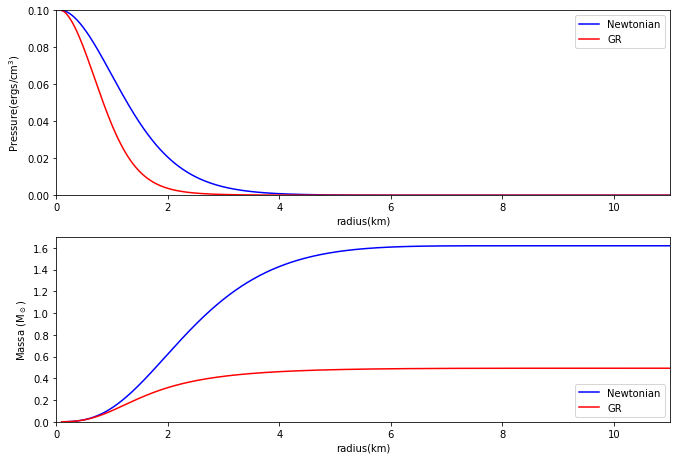

In [92]:
#relativistic neutron star
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k1=(3.*pi**2/(m_n*c**2))**(4./3.)
kr=hbar*c*k1/(12.*pi**2)/(10.0**(1/3))
gr=4./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)
ep0=1.6268782212048284e+38

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def eps(a,K,gamma):
    f=((R0/a)**gamma/K)**(1./(gamma-1))
    f1=convert(f/10)
    return f1

def bet(e0):
    return 4*pi*e0

def kbar(K,gamma):
    e0=1.6268782212048284e+38 #nilai saat func eps return f saat a=1
    return K*e0**(gamma-1)

y1=convert(ep0/10)
y2=bet(y1)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    K=1./3.
    if P<=0:
        P=1.0e-20
    return (P/K)**(3./4.)

def hydros(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M/r**2
    two=beta*r**2*eden
    derivs=[one,two]
    return derivs

def tov(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def solve2(P0,rStop):
    eden=eos(P0)
    beta=bet(y1)
    dr=0.01
    M0=beta*eden*dr**3/3.
    y0=[P0,M0]
    r=np.arange(0.1,rStop,dr)
    psol=odeint(hydros,y0,r)
    psol2=odeint(tov,y0,r)
    return r,psol[:,0], psol[:,1], psol2[:,0], psol2[:,1]

ans3=solve2(1.0e-1,100)

fig=plt.figure(figsize=(9.5,6.5))
ax1=fig.add_subplot(211)
ax1.plot(ans3[0],ans3[1],color='blue',label='Newtonian')
ax1.plot(ans3[0],ans3[3],color='red',label='GR') #GR
ax1.set_xlabel('radius(km)')
ax1.set_ylabel(r'Pressure(ergs/cm$^3$)')
ax1.legend(loc='upper right')
ax1.set_xlim(0,11)
ax1.set_ylim(0,1.0e-1)

ax2=fig.add_subplot(212)
ax2.plot(ans3[0],ans3[2],color='blue',label='Newtonian')
ax2.plot(ans3[0],ans3[4],color='red',label='GR')
ax2.set_xlabel('radius(km)')
ax2.set_ylabel(r'Massa (M$_\odot$)')
ax2.legend(loc='lower right')
ax2.set_xlim(0,11)
ax2.set_ylim(0,1.7)

fig.tight_layout()
fig.savefig('rel(1e-1).png')
fig.show()

In [16]:
#relativistic neutron star
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k1=(3.*pi**2/(m_n*c**2))**(4./3.)
kr=hbar*c*k1/(12.*pi**2)/(10.0**(1/3))
gr=4./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)
ep0=1.6268782212048284e+38

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def eps(a,K,gamma):
    f=((R0/a)**gamma/K)**(1./(gamma-1))
    f1=convert(f/10)
    return f1

def bet(e0):
    return 4*pi*e0

def kbar(K,gamma):
    e0=1.6268782212048284e+38 #nilai saat func eps return f saat a=1
    return K*e0**(gamma-1)

y1=convert(ep0/10)
y2=bet(y1)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    K=1./3.
    if P<=0:
        P=1.0e-20
    return (P/K)**(3./4.)

def hydros(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M/r**2
    two=beta*r**2*eden
    derivs=[one,two]
    return derivs

def tov(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def solve(P0,rStop):
    eden=eos(P0)
    beta=bet(y1)
    dr=0.01
    M0=beta*eden*dr**3/3.
    y0=[P0,M0]
    r=np.arange(0.1,rStop,dr)
    psol=odeint(hydros,y0,r)
    psol2=odeint(tov,y0,r)
    rstar = 0. 
    mstar = 0.
    count = 0
    for i in psol[:,0]:
        if i>1.e-20:
            count = count + 1    
            rstar = rstar + dr
            mstar = psol[count,1]
    rstar2 = 0. 
    mstar2 = 0.
    count2 = 0
    for i in psol2[:,0]:
        if i>1.e-20:
            count2 = count2 + 1    
            rstar2 = rstar2 + dr
            mstar2 = psol2[count2,1]
    return rstar,mstar,rstar2,mstar2

ans4=solve(1.0e-5,100)
print("saat input alpha = 3 R0 dan P(0) = ...")
print("beta = {}".format(y2))
print("eps0 = {}".format(y1))
print("------Newtonian-------")
print("R = {}".format(ans4[0]))
print("M = {}".format(ans4[1]))
print("-------GR-------------")
print("R = {}".format(ans4[2]))
print("M = {}".format(ans4[3]))

saat input alpha = 3 R0 dan P(0) = ...
beta = 1.1436383766645435
eps0 = 0.0910078503778765
------Newtonian-------
R = 82.64000000000537
M = 1.618676832145676
-------GR-------------
R = 80.10000000000407
M = 1.3491072183515314


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


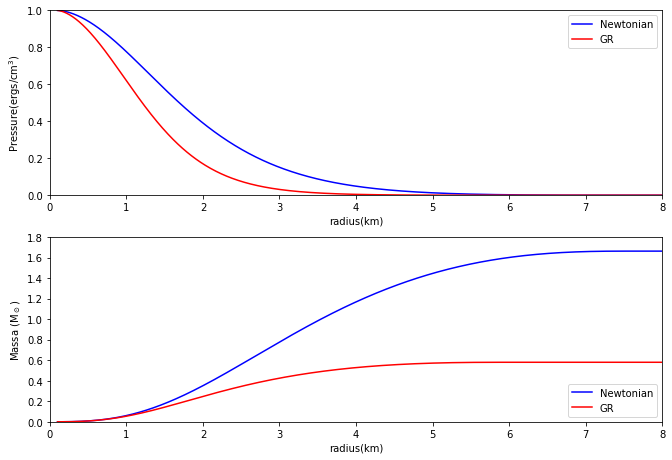

In [26]:
#neutron star eos combination 
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)
ep0=m_n**4*c**5/(3*pi**2*hbar**3)

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def bet(e0):
    return 4*pi*e0

y1=convert(ep0)
y2=bet(y1)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    # this is the fit to the non-interacting neutron matter pressure 
    anr = 2.53784142
    ar = 2.79036279
    if P<=0: 
        P=1.e-20
    return anr*P**(3./5.) + ar*P

def hcomb(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M/r**2
    two=beta*r**2*eden
    derivs=[one,two]
    return derivs

def tcomb(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def combsolve(P0,rStop):
    eden=eos(P0)
    beta=bet(y1)
    dr=0.01
    M0=beta*eden*dr**3/3.
    y0=[P0,M0]
    r=np.arange(0.1,rStop,dr)
    hsol=odeint(hcomb,y0,r)
    tsol=odeint(tcomb,y0,r)
    return r,hsol[:,0],hsol[:,1],tsol[:,0],tsol[:,1]

ans5=combsolve(1,30)

fig=plt.figure(figsize=(9.5,6.5))
ax1=fig.add_subplot(211)
ax1.plot(ans5[0],ans5[1],color='blue',label='Newtonian')
ax1.plot(ans5[0],ans5[3],color='red',label='GR') #GR
ax1.set_xlabel('radius(km)')
ax1.set_ylabel(r'Pressure(ergs/cm$^3$)')
ax1.legend(loc='upper right')
ax1.set_xlim(0,8)
ax1.set_ylim(0,1)

ax2=fig.add_subplot(212)
ax2.plot(ans5[0],ans5[2],color='blue',label='Newtonian')
ax2.plot(ans5[0],ans5[4],color='red',label='GR')
ax2.set_xlabel('radius(km)')
ax2.set_ylabel(r'Massa (M$_\odot$)')
ax2.legend(loc='lower right')
ax2.set_xlim(0,8)
ax2.set_ylim(0,1.8)

fig.tight_layout()
fig.savefig('comb(1.0).png')
fig.show()

In [1]:
#neutron star eos combination 
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)
ep0=m_n**4*c**5/(3.*pi**2*hbar**3)

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def bet(e0):
    return 4*pi*e0

y1=convert(ep0)
y2=bet(y1)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    # this is the fit to the non-interacting neutron matter pressure 
    anr = 2.53784142
    ar = 2.79036279
    if P<=0: 
        P=1.e-20
    return anr*P**(3./5.) + ar*P

def hcomb(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M/r**2
    two=beta*r**2*eden
    derivs=[one,two]
    return derivs

def tcomb(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def combsolve(P0,rStop):
    eden=eos(P0)
    beta=bet(y1)
    dr=0.01
    M0=beta*eden*dr**3/3.
    y0=[P0,M0]
    r=np.arange(0.1,rStop,dr)
    hsol=odeint(hcomb,y0,r)
    tsol=odeint(tcomb,y0,r)
    rstar = 0. 
    mstar = 0.
    count = 0
    for i in hsol[:,0]:
        if i>1.e-20:
            count = count + 1    
            rstar = rstar + dr
            mstar = hsol[count,1]
    rstar2 = 0. 
    mstar2 = 0.
    count2 = 0
    for i in tsol[:,0]:
        if i>1.e-20:
            count2 = count2 + 1    
            rstar2 = rstar2 + dr
            mstar2 = tsol[count2,1]
    return rstar,mstar,rstar2,mstar2

def mass_radius(pmin,pmax): 
    imax = 30    
    pc = np.zeros(imax)
    mass = np.zeros(imax)
    radius = np.zeros(imax)
    mass2 = np.zeros(imax)
    radius2 = np.zeros(imax)
    for i in range(imax):
        pc[i] = pmin + (pmax-pmin)*i/30
        radius[i],mass[i],radius2[i],mass2[i] = combsolve(pc[i],40)
    return pc,radius,mass,radius2,mass2

ans6=combsolve(0.09,30)
print("saat input P(0) = 0.05")
print("beta = {}".format(y2))
print("eps0 = {}".format(y1))
print("------Newtonian-------")
print("R = {}".format(ans6[0]))
print("M = {}".format(ans6[1]))
print("-------GR-------------")
print("R = {}".format(ans6[2]))
print("M = {}".format(ans6[3]))

saat input P(0) = 0.05
beta = 0.03858084634376071
eps0 = 0.0030701662021391973
------Newtonian-------
R = 10.649999999999817
M = 1.4047381538723922
-------GR-------------
R = 8.799999999999857
M = 0.7246393053065991


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


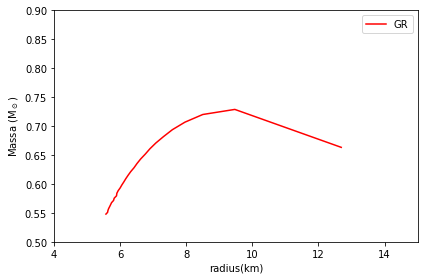

In [44]:
ans7=mass_radius(0.01,1.5) #GR effects

fig=plt.figure(figsize=(6,4))
plt.plot(ans7[3],ans7[4],color='red',label='GR')
plt.xlabel('radius(km)')
plt.ylabel(r'Massa (M$_\odot$)')
plt.legend(loc='upper right')
plt.xlim(4,15)
plt.ylim(0.5,0.9)

fig.tight_layout()
fig.savefig('comb GR(M-R relation).png')
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


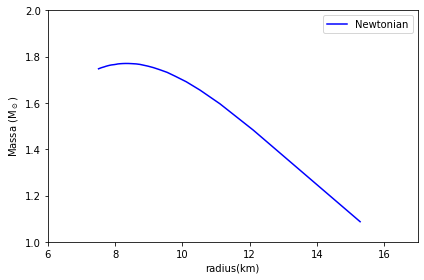

In [267]:
ans8=mass_radius(0.01,1.5)

fig=plt.figure(figsize=(6,4))
plt.plot(ans7[1],ans7[2],color='blue',label='Newtonian')
plt.xlabel('radius(km)')
plt.ylabel(r'Massa (M$_\odot$)')
plt.legend(loc='upper right')
plt.xlim(6,17)
plt.ylim(1,2)

fig.tight_layout()
fig.savefig('comb Newt(M-R relation).png')
fig.show()

In [39]:
#neutron star eos combination consist of multicomponent of matter
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)
ep0=m_n**4*c**5/(3.*pi**2*hbar**3) #?

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def eps(a,K,gamma):
    f=((R0/a)**gamma/K)**(1./(gamma-1))
    f1=convert(f/10)
    return f1

def bet(e0):
    return 4*pi*e0

def kbar(K,gamma):
    e0=ep0*10
    return K*e0**(gamma-1)

y1=convert(ep0)
y2=bet(y1)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    # this is the fit to the non-interacting neutron matter pressure 
    anr = 2.33495528
    ar = 2.94745935
    if P<=0: 
        P=1.e-25
    return anr*P**(3./5.) + ar*P

def hcomb(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M/r**2
    two=beta*r**2*eden
    derivs=[one,two]
    return derivs

def tcomb(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def combsolve2(P0,rStop):
    eden=eos(P0)
    beta=bet(y1)
    dr=0.01
    M0=beta*eden*dr**3/3.
    y0=[P0,M0]
    r=np.arange(0.1,rStop,dr)
    hsol=odeint(hcomb,y0,r)
    tsol=odeint(tcomb,y0,r)
    rstar = 0. 
    mstar = 0.
    count = 0
    for i in hsol[:,0]:
        if i>1.e-25:
            count = count + 1    
            rstar = rstar + dr
            mstar = hsol[count,1]
    rstar2 = 0. 
    mstar2 = 0.
    count2 = 0
    for i in tsol[:,0]:
        if i>1.e-25:
            count2 = count2 + 1    
            rstar2 = rstar2 + dr
            mstar2 = tsol[count2,1]
    return rstar,mstar,rstar2,mstar2

def mass_radius2(pmin,pmax): 
    imax = 30    
    pc = np.zeros(imax)
    mass = np.zeros(imax)
    radius = np.zeros(imax)
    mass2 = np.zeros(imax)
    radius2 = np.zeros(imax)
    for i in range(imax):
        pc[i] = pmin + (pmax-pmin)*i/30
        radius[i],mass[i],radius2[i],mass2[i] = combsolve2(pc[i],50)
    return pc,radius,mass,radius2,mass2

ans9=combsolve2(1,30)
print("saat input P(0) = 0.01")
print("beta = {}".format(y2))
print("eps0 = {}".format(y1))
print("------Newtonian-------")
print("R = {}".format(ans9[0]))
print("M = {}".format(ans9[1]))
print("-------GR-------------")
print("R = {}".format(ans9[2]))
print("M = {}".format(ans9[3]))

saat input P(0) = 0.01
beta = 0.03858084634376071
eps0 = 0.0030701662021391973
------Newtonian-------
R = 7.949999999999875
M = 1.7659471745401545
-------GR-------------
R = 6.3299999999999095
M = 0.6104524754604085


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


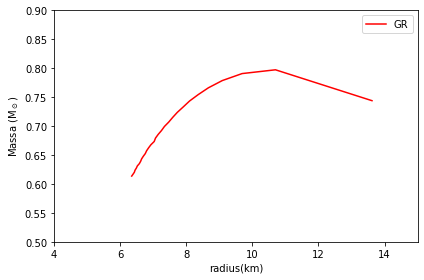

In [40]:
ans10=mass_radius2(0.01,1) #GR effects

fig=plt.figure(figsize=(6,4))

plt.plot(ans10[3],ans10[4],color='red',label='GR')
plt.xlabel('radius(km)')
plt.ylabel(r'Massa (M$_\odot$)')
plt.legend(loc='upper right')
plt.xlim(4,15)
plt.ylim(0.5,0.9)

fig.tight_layout()
fig.savefig('comb2 GR(M-R relation).png')
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


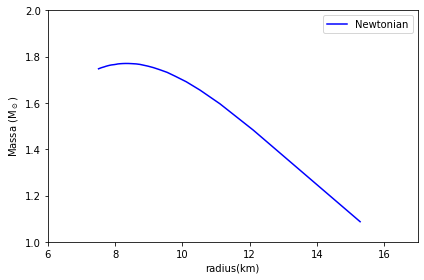

In [41]:
ans11=mass_radius2(0.01,1.5) #GR effects

fig=plt.figure(figsize=(6,4))

plt.plot(ans11[1],ans11[2],color='blue',label='Newtonian')
plt.xlabel('radius(km)')
plt.ylabel(r'Massa (M$_\odot$)')
plt.legend(loc='upper right')
plt.xlim(6,17)
plt.ylim(1,2)

fig.tight_layout()
fig.savefig('comb2 Newt(M-R relation).png')
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


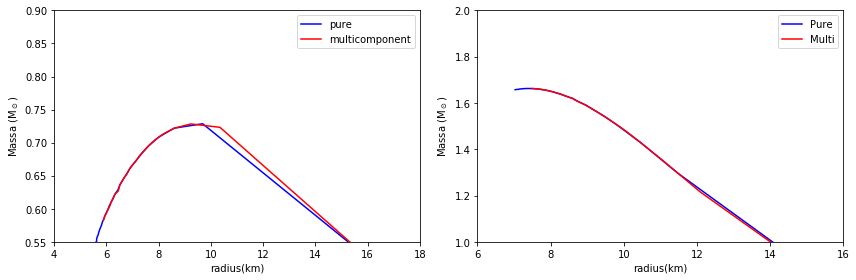

In [52]:
ans7=mass_radius(0.002,1.5)
ans10=mass_radius2(0.002,1)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(121)
ax1.plot(ans7[3],ans7[4],color='blue',label='pure')
ax1.plot(ans10[3],ans10[4],'r',label='multicomponent') #GR
ax1.set_xlabel('radius(km)')
ax1.set_ylabel(r'Massa (M$_\odot$)')
ax1.legend(loc='upper right')
ax1.set_xlim(4,18)
ax1.set_ylim(0.55,0.9)

ax2=fig.add_subplot(122)
ax2.plot(ans7[1],ans7[2],color='blue',label='Pure')
ax2.plot(ans10[1],ans10[2],'r',label='Multi')
ax2.set_xlabel('radius(km)')
ax2.set_ylabel(r'Massa (M$_\odot$)')
ax2.legend(loc='upper right')
ax2.set_xlim(6,16)
ax2.set_ylim(1,2)

fig.tight_layout()
fig.savefig('comb (perbandingan).png')
fig.show()

In [31]:
#neutron star eos with nuclear interaction
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)
ep0=m_n**4*c**5/(3.*pi**2*hbar**3) 
k0=0.00077807

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def eps(a,K,gamma):
    f=((R0/a)**gamma/K)**(1./(gamma-1))
    f1=convert(f/10)
    return f1

def bet(e0):
    return 4*pi*e0

y1=convert(ep0)
y2=bet(y1)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    # this is the fit to the non-interacting neutron matter pressure 
    A = 0.89972285
    if P<=0: 
        P=1.e-25
    return A*P**(1/2)

def hcomb(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M/r**2
    two=beta*r**2*eden
    derivs=[one,two]
    return derivs

def tcomb(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def combsolve3(P0,rStop):
    eden=eos(P0)
    beta=bet(y1)
    dr=0.01
    M0=beta*eden*dr**3/3.
    y0=[P0,M0]
    r=np.arange(0.1,rStop,dr)
    hsol=odeint(hcomb,y0,r)
    tsol=odeint(tcomb,y0,r)
    rstar = 0. 
    mstar = 0.
    count = 0
    for i in hsol[:,0]:
        if i>1.e-25:
            count = count + 1    
            rstar = rstar + dr
            mstar = hsol[count,1]
    rstar2 = 0. 
    mstar2 = 0.
    count2 = 0
    for i in tsol[:,0]:
        if i>1.e-25:
            count2 = count2 + 1    
            rstar2 = rstar2 + dr
            mstar2 = tsol[count2,1]
    return rstar,mstar,rstar2,mstar2

def mass_radius3(pmin,pmax): 
    imax = 30    
    pc = np.zeros(imax)
    mass = np.zeros(imax)
    radius = np.zeros(imax)
    mass2 = np.zeros(imax)
    radius2 = np.zeros(imax)
    for i in range(imax):
        pc[i] = pmin + (pmax-pmin)*i/30
        radius[i],mass[i],radius2[i],mass2[i] = combsolve3(pc[i],50)
    return pc,radius,mass,radius2,mass2

ans12=combsolve3(0.5,100)
print("saat input P(0) = 0.05")
print("beta = {}".format(y2))
print("eps0 = {}".format(y1))
print("------Newtonian-------")
print("R = {}".format(ans12[0]))
print("M = {}".format(ans12[1]))
print("-------GR-------------")
print("R = {}".format(ans12[2]))
print("M = {}".format(ans12[3]))

saat input P(0) = 0.05
beta = 0.03858084634376071
eps0 = 0.0030701662021391973
------Newtonian-------
R = 20.59000000000042
M = 22.016563045664526
-------GR-------------
R = 10.419999999999822
M = 2.129548447784132


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


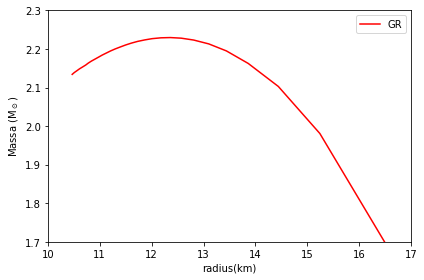

In [35]:
ans12=mass_radius3(0.01,0.5)

fig=plt.figure(figsize=(6,4))

plt.plot(ans12[3],ans12[4],color='red',label='GR')
plt.xlabel('radius(km)')
plt.ylabel(r'Massa (M$_\odot$)')
plt.legend(loc='upper right')
plt.xlim(10,17)
plt.ylim(1.7,2.3)

fig.tight_layout()
fig.savefig('comb Nuclear(M-R relation).png')
fig.show()

In [17]:
#C=0
#neutron star eos with nuclear interaction
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)
ep0=m_n**4*c**5/(3.*pi**2*hbar**3) 
k0=0.00077807

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def eps(a,K,gamma):
    f=((R0/a)**gamma/K)**(1./(gamma-1))
    f1=convert(f/10)
    return f1

def bet(e0):
    return 4*pi*e0

y1=convert(ep0)
y2=bet(y1)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    # this is the fit to the non-interacting neutron matter pressure 
    A = 0.80966318
    if P<=0: 
        P=1.e-25
    return A*P**(1/2)

def eos2(P):
    # this is the fit to the non-interacting neutron matter pressure 
    A = 0.87244601
    if P<=0: 
        P=1.e-25
    return A*P**(1/2)

def tcomb(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def tcomb2(y,r):
    P,M=y
    beta=bet(y1)
    eden=eos2(P)
    one=-R0*eden*M*(1+(P/eden))*(1 + beta*(P/M)*r**3)/(r**2-2.*R0*M*r)
    two=beta*r**2*eden
    derivs2=[one,two]
    return derivs2

def combsolve4(P0,rStop):
    eden=eos(P0)
    beta=bet(y1)
    dr=0.01
    M0=beta*eden*dr**3/3.
    y0=[P0,M0]
    r=np.arange(0.1,rStop,dr)
    tsol=odeint(tcomb,y0,r)
    tsol2=odeint(tcomb2,y0,r)
    rstar = 0. 
    mstar = 0.
    count = 0
    for i in tsol[:,0]:
        if i>1.e-25:
            count = count + 1    
            rstar = rstar + dr
            mstar = tsol[count,1]
    rstar2 = 0. 
    mstar2 = 0.
    count2 = 0
    for i in tsol2[:,0]:
        if i>1.e-25:
            count2 = count2 + 1    
            rstar2 = rstar2 + dr
            mstar2 = tsol2[count2,1]
    return rstar,mstar,rstar2,mstar2

def mass_radius4(pmin,pmax): 
    imax = 30    
    pc = np.zeros(imax)
    mass = np.zeros(imax)
    radius = np.zeros(imax)
    mass2 = np.zeros(imax)
    radius2 = np.zeros(imax)
    for i in range(imax):
        pc[i] = pmin + (pmax-pmin)*i/30
        radius[i],mass[i],radius2[i],mass2[i] = combsolve4(pc[i],50)
    return pc,radius,mass,radius2,mass2

ans13=combsolve4(0.5,100)
print("saat input P(0) = 0.05")
print("beta = {}".format(y2))
print("eps0 = {}".format(y1))
print("------C=0-------")
print("R = {}".format(ans13[0]))
print("M = {}".format(ans13[1]))
print("-------C=0.15-------------")
print("R = {}".format(ans13[2]))
print("M = {}".format(ans13[3]))

saat input P(0) = 0.05
beta = 0.03858084634376071
eps0 = 0.0030701662021391973
------C=0-------
R = 11.289999999999804
M = 2.3324773041523024
-------C=0.15-------------
R = 10.669999999999817
M = 2.187184402351872


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


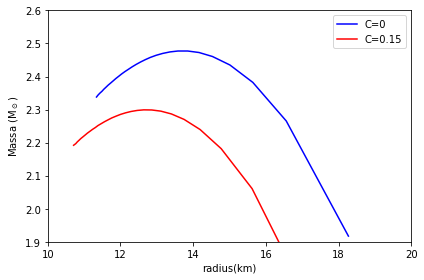

In [27]:
ans13=mass_radius4(0.01,0.5)

fig=plt.figure(figsize=(6,4))

plt.plot(ans13[1],ans13[2],color='blue',label='C=0')
plt.plot(ans13[3],ans13[4],color='red',label='C=0.15')
plt.xlabel('radius(km)')
plt.ylabel(r'Massa (M$_\odot$)')
plt.legend(loc='upper right')
plt.xlim(10,20)
plt.ylim(1.9,2.6)

fig.tight_layout()
fig.savefig('comb NuclearC(M-R relation).png')
fig.show()